In [27]:
import cv2
import pylab
import numpy as np
import matplotlib.pyplot as plt
from tools import laplacian_pyramid, sobel, lucas_kanade

Gaussian and Laplacian pyramids
===============================

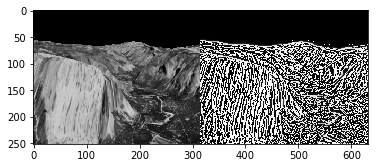

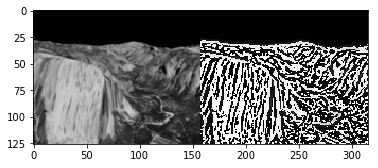

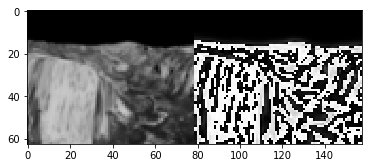

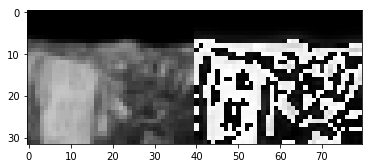

In [28]:
dataseq1a = cv2.imread("images/DataSeq1/yos_img_01.jpg")[:, :, 0]
dataseq1b = cv2.imread("images/DataSeq1/yos_img_02.jpg")[:, :, 0]
laplacians, Gaussians = laplacian_pyramid.compute_pyramid(dataseq1a, 4)
for i in range(4):
    pylab.imshow(np.hstack((Gaussians[i], sobel.normalize(laplacians[i]))), cmap=pylab.gray())
    pylab.show()


LK optical flow
===============

2.1
---

In [29]:
testseq0 = cv2.imread("images/TestSeq/Shift0.png")[:, :, 0]
testseqR2 = cv2.imread("images/TestSeq/ShiftR2.png")[:, :, 0]
testseqR5U5 = cv2.imread("images/TestSeq/ShiftR5U5.png")[:, :, 0]
testseqR10 = cv2.imread("images/TestSeq/ShiftR10.png")[:, :, 0]
testseqR20 = cv2.imread("images/TestSeq/ShiftR20.png")[:, :, 0]
testseqR40 = cv2.imread("images/TestSeq/ShiftR40.png")[:, :, 0]

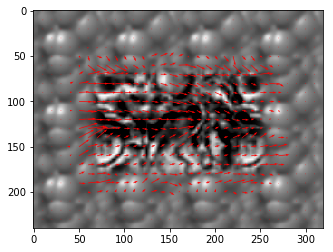

In [30]:
grad_t = testseq0 - testseqR2
grad_t = grad_t.astype(float)
grad_x, grad_y = sobel.compute_gradients(testseq0)
U, V = lucas_kanade.wrapper_compute_lk_cuda(grad_x, grad_y, grad_t, 20)
fig, ax = lucas_kanade.draw_field(img=testseq0, U=U, V=V, stride=10, scale=0.1, autoprint=False)
plt.savefig("output/PS5-2-1-0")
plt.show()

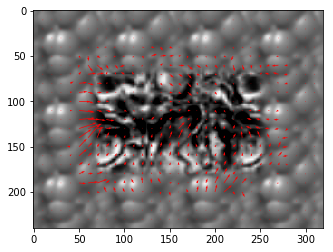

In [31]:
grad_t = testseq0 - testseqR5U5
grad_t = grad_t.astype(float)
grad_x, grad_y = sobel.compute_gradients(testseq0)
U, V = lucas_kanade.wrapper_compute_lk_cuda(grad_x, grad_y, grad_t, 20)
fig, ax = lucas_kanade.draw_field(img=testseq0, U=U, V=V, stride=10, scale=0.1, autoprint=False)
plt.savefig("output/PS5-2-1-1")
plt.show()

2.2
---

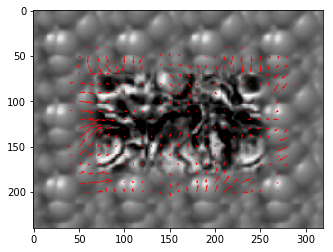

In [32]:
grad_t = testseq0 - testseqR10
grad_t = grad_t.astype(float)
grad_x, grad_y = sobel.compute_gradients(testseq0)
U, V = lucas_kanade.wrapper_compute_lk_cuda(grad_x, grad_y, grad_t, 20)
fig, ax = lucas_kanade.draw_field(img=testseq0, U=U, V=V, stride=10, scale=0.1, autoprint=False)
plt.savefig("output/PS5-2-2-0")
plt.show()

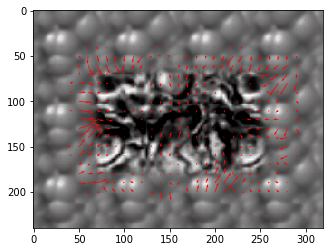

In [33]:
grad_t = testseq0 - testseqR20
grad_t = grad_t.astype(float)
grad_x, grad_y = sobel.compute_gradients(testseq0)
U, V = lucas_kanade.wrapper_compute_lk_cuda(grad_x, grad_y, grad_t, 20)
fig, ax = lucas_kanade.draw_field(img=testseq0, U=U, V=V, stride=10, scale=0.1, autoprint=False)
plt.savefig("output/PS5-2-2-1")
plt.show()

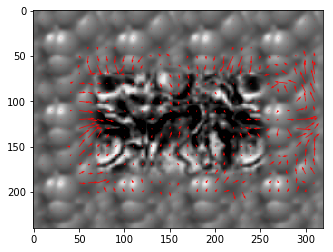

In [34]:
grad_t = testseq0 - testseqR40
grad_t = grad_t.astype(float)
grad_x, grad_y = sobel.compute_gradients(testseq0)
U, V = lucas_kanade.wrapper_compute_lk_cuda(grad_x, grad_y, grad_t, 20)
fig, ax = lucas_kanade.draw_field(img=testseq0, U=U, V=V, stride=10, scale=0.1, autoprint=False)
plt.savefig("output/PS5-2-2-2")
plt.show()

as we can see the optical flow goes wrong for bigger displacements, this is the case especially on edges of the moving object, (probably because of occlusion problems)

2.3
---

In [35]:
dataseq0 = cv2.imread("images/DataSeq1/yos_img_01.jpg")[:, :, 0]
dataseq1 = cv2.imread("images/DataSeq1/yos_img_02.jpg")[:, :, 0]
dataseq2 = cv2.imread("images/DataSeq1/yos_img_03.jpg")[:, :, 0]

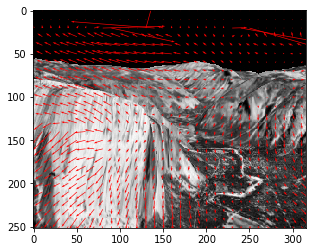

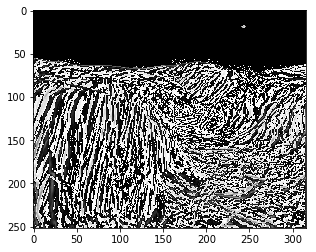

In [36]:
grad_t = dataseq0 - dataseq1
grad_t = grad_t.astype(float)
grad_x, grad_y = sobel.compute_gradients(dataseq0)
U, V = lucas_kanade.wrapper_compute_lk_cuda(
    laplacian_pyramid.reduce(grad_x), 
    laplacian_pyramid.reduce(grad_y), 
    laplacian_pyramid.reduce(grad_t),
    20)
fig, ax = lucas_kanade.draw_field(img=dataseq0,
                                  U=laplacian_pyramid.expand(U),
                                  V=laplacian_pyramid.expand(V),
                                  stride=10, scale=0.1, autoprint=False)
plt.savefig("output/PS5-2-3-0")
plt.show()
warped = lucas_kanade.warp_img(dataseq0, laplacian_pyramid.expand(U), laplacian_pyramid.expand(V))
pylab.imshow(sobel.normalize(dataseq1-warped))
pylab.savefig("output/PS5-2-3-1")
pylab.show()

Hierarchical LK optical flow
============================

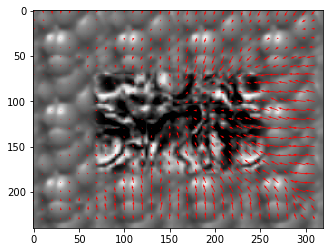

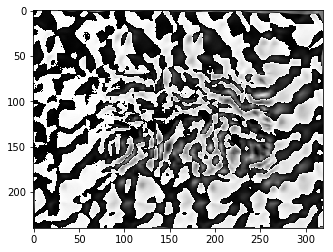

In [39]:
U, V = lucas_kanade.wrapper_LK_pyramid(testseq0, testseqR10, 3, 10)
fig, ax = lucas_kanade.draw_field(img=testseq0, U=U, V=V, stride=10, scale=1, autoprint=False)
plt.savefig("output/PS5-3-1-0")
plt.show()
warped = lucas_kanade.warp_img(testseqR10, U, V)
pylab.imshow(sobel.normalize(testseqR10-warped))
pylab.savefig("output/PS5-3-1-1")
pylab.show()

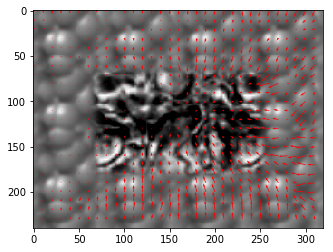

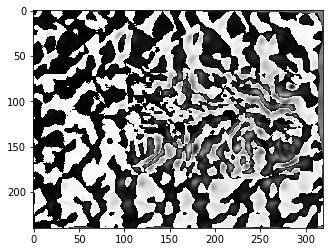

In [44]:
U, V = lucas_kanade.wrapper_LK_pyramid(testseq0, testseqR40, 3, 10)
fig, ax = lucas_kanade.draw_field(img=testseq0, U=U, V=V, stride=10, scale=1, autoprint=False)
plt.savefig("output/PS5-3-1-2")
plt.show()
warped = lucas_kanade.warp_img(testseqR40, U, V)
pylab.imshow(sobel.normalize(testseqR40-warped))
pylab.savefig("output/PS5-3-1-3")
pylab.show()

it seems like there is a problem with the warping function, it can be seen by displaying warped images along iterations.

4 the juggler sequence
======================

in order to work on this problem, i would use the fact that:

FK(im_t, im_t+1) = - FK(im_t, im_t-1)


is true for rectiliniear and uniform movements. We can then average U_t_t+1 and U_t_t-1 to get a better estimation

In [49]:
juggle0 = cv2.imread("images/Juggle/0.png")[:, :, 0]
juggle1 = cv2.imread("images/Juggle/1.png")[:, :, 0]
juggle2 = cv2.imread("images/Juggle/2.png")[:, :, 0]

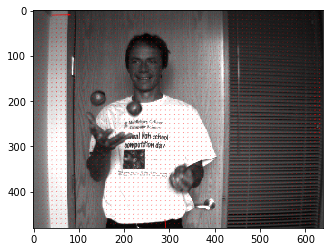

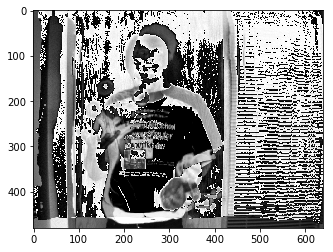

In [ ]:
U1, V1 = lucas_kanade.wrapper_LK_pyramid(juggle1, juggle2, 5, 40)
U2, V2 = lucas_kanade.wrapper_LK_pyramid(juggle1, juggle0, 5, 40)


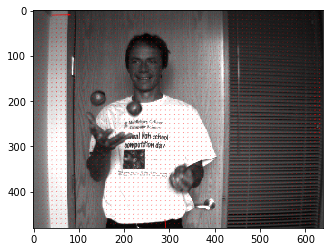

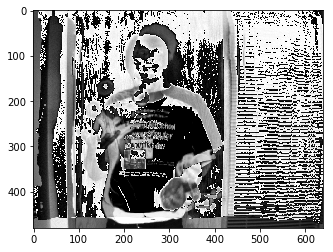

In [53]:
U = np.subtract(U1, U2) * 0.5
V = np.subtract(V1, V2) * 0.5
fig, ax = lucas_kanade.draw_field(img=juggle0, U=U, V=V, stride=10, scale=10, autoprint=False)
plt.savefig("output/PS5-4-1-0")
plt.show()
warped = lucas_kanade.warp_img(juggle0, U, V)
pylab.imshow(sobel.normalize(juggle1-warped))
pylab.savefig("output/PS5-4-1-1")
pylab.show()


5 Taxi sequence
===============

use RANSAC to find a model of motion:
 - model: perspective deformation (allow to represent 3d plannar movement in a 2d scene)
 - pick 2 points of the image and get corresponding U and V (2 2d vectors are enough for perspective)

Once we have the model, keeps the inliers to make the segmentation map.